Importing the Dependencies

In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss,roc_auc_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.ensemble import StackingClassifier
from sklearn import model_selection
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression

Data Collection & Analysis



In [132]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('Parkinsson disease (1).csv')

In [133]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [134]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [135]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [136]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [137]:
# getting some statistical measures about the data
parkinsons_data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [138]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [139]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()


<ipython-input-139-fe279e55666c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target


11 Features selected through Mutual Information Gain Algorithm


In [140]:
X = parkinsons_data.drop(columns=['name','status','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','Shimmer:APQ3','Shimmer:DDA','NHR','RPDE','DFA','D2'], axis=1)
Y = parkinsons_data['status']

In [141]:
print(X)


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  \
0        119.992       157.302        74.997           0.00007   
1        122.400       148.650       113.819           0.00008   
2        116.682       131.111       111.555           0.00009   
3        116.676       137.871       111.366           0.00009   
4        116.014       141.781       110.655           0.00011   
..           ...           ...           ...               ...   
190      174.188       230.978        94.261           0.00003   
191      209.516       253.017        89.488           0.00003   
192      174.688       240.005        74.287           0.00008   
193      198.764       396.961        74.904           0.00004   
194      214.289       260.277        77.973           0.00003   

     MDVP:Shimmer(dB)  Shimmer:APQ5  MDVP:APQ     HNR   spread1   spread2  \
0               0.426       0.03130   0.02971  21.033 -4.813031  0.266482   
1               0.626       0.04518   0.04368  19.085

In [142]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data (80:20)

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [144]:
print(X.shape, X_train.shape, X_test.shape)

(195, 11) (156, 11) (39, 11)


Data Standardization

In [145]:
scaler = StandardScaler()

In [146]:
scaler.fit(X_train)

StandardScaler()

In [147]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [148]:
print(X_train)

[[-0.33778985 -0.18615128 -0.91108592 ...  0.01044331  0.30280853
  -0.10162697]
 [ 1.09942206  0.25239988  0.75943197 ...  0.07888192  0.96268476
   0.0072543 ]
 [-0.87522007 -0.56486872 -0.36994789 ... -0.31125415 -0.00124084
  -0.50303797]
 ...
 [ 0.9678342   0.13891462 -0.82445104 ... -0.15835879  0.58317634
  -0.25687066]
 [-0.76998373 -0.61753724 -0.40869159 ...  0.73632009  0.20120626
  -0.44340107]
 [ 1.19847659  0.49335125  1.11785168 ... -0.42091224 -0.10397925
  -0.53951003]]


Model Training

**Support Vector Machine Model**

In [149]:
model = svm.SVC(kernel='linear')

In [150]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [151]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(classification_report(Y_train, X_train_prediction))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        38
           1       0.87      0.94      0.91       118

    accuracy                           0.85       156
   macro avg       0.82      0.76      0.78       156
weighted avg       0.85      0.85      0.85       156



In [152]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8525641025641025


In [153]:
# accuracy score on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [154]:
print('Accuracy score of test data : ', test_data_accuracy)
print(classification_report(Y_test, X_test_prediction))

Accuracy score of test data :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



**Naive Bayes**

In [155]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [156]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
rec_for_nb = recall_score(Y_test, Y_pred_nb)
f1_for_nb = f1_score(Y_test, Y_pred_nb)
print(rec_for_nb, f1_for_nb)

The accuracy score achieved using Naive Bayes is: 74.36 %
0.6896551724137931 0.7999999999999999


In [157]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.95      0.69      0.80        29

    accuracy                           0.74        39
   macro avg       0.73      0.79      0.72        39
weighted avg       0.84      0.74      0.76        39



**KNN**

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [159]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
rec_for_knn = recall_score(Y_test, Y_pred_knn)
f1_for_knn = f1_score(Y_test, Y_pred_knn)
print(rec_for_knn, f1_for_knn)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

0.9310344827586207 0.9310344827586207
The accuracy score achieved using KNN is: 89.74 %


In [160]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



**XGBoost**

In [161]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [162]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
rec_for_xgb = recall_score(Y_test, Y_pred_xgb)
f1_for_xgb = f1_score(Y_test, Y_pred_xgb)
print(rec_for_xgb, f1_for_xgb)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

0.9655172413793104 0.9655172413793104
The accuracy score achieved using XGBoost is: 94.87 %


In [163]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [164]:
clf1 = LogisticRegression().fit(X_train, Y_train)
y_test_reg_pred1 = clf1.predict(X_test)
print(classification_report(Y_test, y_test_reg_pred1))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39



SMOTE Oversampling

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
smote = SMOTE(random_state=22, k_neighbors=7, sampling_strategy="minority")
x_sm, y_sm = smote.fit_resample(X_train, Y_train)

In [167]:
y_sm.value_counts()

1    118
0    118
Name: status, dtype: int64

**SVM with SMOTE**

In [168]:
model2 = svm.SVC(kernel='linear')
# training the SVM model with training data
model2.fit(x_sm, y_sm)

SVC(kernel='linear')

In [169]:
# accuracy score on training data
X_train_prediction2 = model2.predict(x_sm)
training_data_accuracy2 = accuracy_score(y_sm, X_train_prediction2)
print('Accuracy score of training data : ', training_data_accuracy2)
print(classification_report(y_sm, X_train_prediction2))

Accuracy score of training data :  0.8686440677966102
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       118
           1       0.91      0.81      0.86       118

    accuracy                           0.87       236
   macro avg       0.87      0.87      0.87       236
weighted avg       0.87      0.87      0.87       236



In [170]:
# accuracy score on testing data
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction2)
print('Accuracy score of test data : ', test_data_accuracy2)
print(classification_report(Y_test, X_test_prediction2))

Accuracy score of test data :  0.7692307692307693
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39



**Naive Bayes with SMOTE**

In [171]:
nb2 = GaussianNB()

nb2.fit(x_sm,y_sm)

Y_pred_nb2 = nb2.predict(X_test)


In [172]:
score_nb2 = round(accuracy_score(Y_pred_nb2,Y_test)*100,2)
rec_for_nb2 = recall_score(Y_test, Y_pred_nb2)
f1_for_nb2 = f1_score(Y_test, Y_pred_nb2)
print(rec_for_nb2, f1_for_nb2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb2)+" %")

0.6896551724137931 0.7999999999999999
The accuracy score achieved using Naive Bayes is: 74.36 %


**KNN with SMOTE**

In [173]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_sm,y_sm)
Y_pred_knn2=knn2.predict(X_test)

In [174]:
score_knn2 = round(accuracy_score(Y_pred_knn2,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn2)+" %")
print(classification_report(Y_test, Y_pred_knn2))

The accuracy score achieved using KNN is: 94.87 %
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



**XGBoost with SMOTE**

In [175]:
xgb_model2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model2.fit(x_sm, y_sm)

Y_pred_xgb2 = xgb_model2.predict(X_test)
score_xgb2 = round(accuracy_score(Y_pred_xgb2,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb2)+" %")
print(classification_report(Y_test, Y_pred_xgb2))

The accuracy score achieved using XGBoost is: 94.87 %
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



Hypertuning SVM parameters

In [176]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [0.1, 0.01, 0.001, 0.0001,1]} 

In [177]:
grid_search_SVM = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3)
grid_fit_SVM=grid_search_SVM.fit(X_train, Y_train)
grid_fit_SVM_smote=grid_search_SVM.fit(x_sm, y_sm)

In [178]:
best_clf_SVM=grid_fit_SVM.best_estimator_
best_clf_SVM_smote=grid_fit_SVM_smote.best_estimator_

In [179]:
best_clf_SVM

SVC(C=10, gamma=0.1)

In [180]:
best_clf_SVM_smote

SVC(C=10, gamma=0.1)

In [181]:
best_clf_SVM.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf_SVM.predict(X_train)
best_test_predictions = best_clf_SVM.predict(X_test)



accuracy_for_training = accuracy_score(Y_train, best_train_predictions)
accuracy_for_testing = accuracy_score(Y_test, best_test_predictions)


print("accuracy score of training data :", accuracy_for_training)
print("accuracy score of testing data :", accuracy_for_testing)

print(classification_report(Y_train, best_train_predictions))
print(classification_report(Y_test, best_test_predictions))
rec_for_svm = recall_score(Y_test, best_test_predictions)
f1_for_svm = f1_score(Y_test, best_test_predictions)
print(rec_for_svm, f1_for_svm)

accuracy score of training data : 0.9615384615384616
accuracy score of testing data : 0.9230769230769231
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.96      0.99      0.97       118

    accuracy                           0.96       156
   macro avg       0.96      0.93      0.95       156
weighted avg       0.96      0.96      0.96       156

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

1.0 0.9508196721311475


In [182]:
best_clf_SVM_smote.fit(x_sm, y_sm)

# Make predictions using the new model.


best_train_predictions_smote = best_clf_SVM_smote.predict(x_sm)
best_test_predictions_smote= best_clf_SVM_smote.predict(X_test)


accuracy_for_training_smote = accuracy_score(y_sm, best_train_predictions_smote)
accuracy_for_testing_smote = accuracy_score(Y_test, best_test_predictions_smote)


print("accuracy score of training data :", accuracy_for_training_smote)
print("accuracy score of testing data :", accuracy_for_testing_smote)

print(classification_report(y_sm, best_train_predictions_smote))
print(classification_report(Y_test, best_test_predictions_smote))
rec_for_svm2 = recall_score(Y_test, best_test_predictions_smote)
f1_for_svm2 = f1_score(Y_test, best_test_predictions_smote)
print(rec_for_svm2, f1_for_svm2)

accuracy score of training data : 0.961864406779661
accuracy score of testing data : 0.9743589743589743
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       118
           1       0.97      0.95      0.96       118

    accuracy                           0.96       236
   macro avg       0.96      0.96      0.96       236
weighted avg       0.96      0.96      0.96       236

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

0.9655172413793104 0.9824561403508771


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,recall
0,SVM,0.974359,1.0,0.965517,1.0,0.982456,0.982759,0.924196,0.936879,0.965517


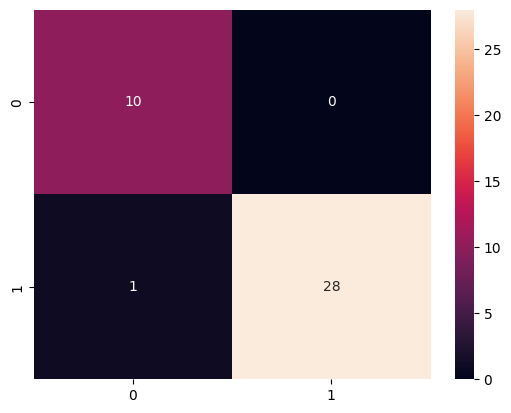

In [183]:
#results for SVM with smote and hyperparameter tuning
CM=confusion_matrix(Y_test,best_test_predictions_smote)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, best_test_predictions_smote)
acc= accuracy_score(Y_test, best_test_predictions_smote)
roc=roc_auc_score(Y_test, best_test_predictions_smote)
prec = precision_score(Y_test, best_test_predictions_smote)
rec = recall_score(Y_test, best_test_predictions_smote)
f1 = f1_score(Y_test, best_test_predictions_smote)

mathew = matthews_corrcoef(Y_test, best_test_predictions_smote)
model_results =pd.DataFrame([['SVM',acc, prec,rec,specificity, f1,roc, loss_log,mathew, rec]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'recall'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,recall
0,KNN,0.948718,1.0,0.931034,1.0,0.964286,0.965517,1.848392,0.88083,0.931034


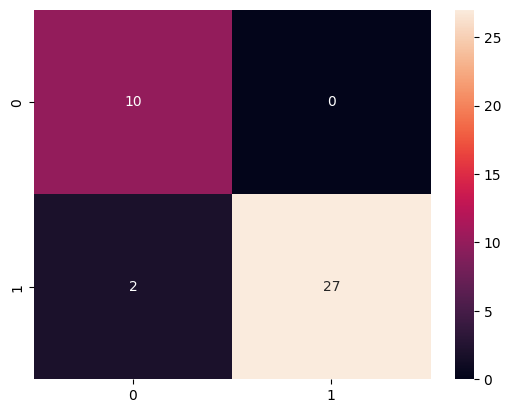

In [184]:
#results for KNN with smote(selected features)
CM=confusion_matrix(Y_test, Y_pred_knn2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, Y_pred_knn2)
acc= accuracy_score(Y_test, Y_pred_knn2)
roc=roc_auc_score(Y_test, Y_pred_knn2)
prec = precision_score(Y_test, Y_pred_knn2)
rec = recall_score(Y_test, Y_pred_knn2)
f1 = f1_score(Y_test, Y_pred_knn2)

mathew = matthews_corrcoef(Y_test, Y_pred_knn2)
model_results =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc, loss_log,mathew, rec]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'recall'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,recall
0,XGBoost,0.948718,0.965517,0.965517,0.9,0.965517,0.932759,1.848392,0.865517,0.965517


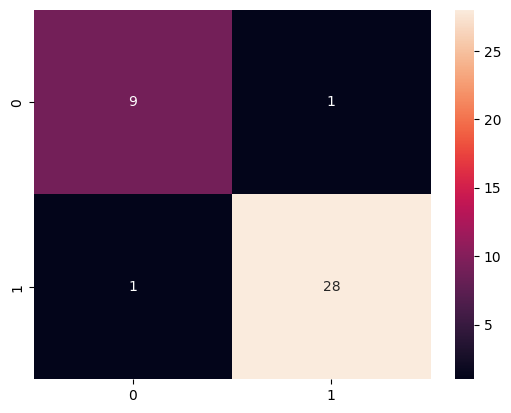

In [185]:
#results for XGBoost with smote(selected features)
CM=confusion_matrix(Y_test, Y_pred_xgb2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, Y_pred_xgb2)
acc= accuracy_score(Y_test, Y_pred_xgb2)
roc=roc_auc_score(Y_test, Y_pred_xgb2)
prec = precision_score(Y_test, Y_pred_xgb2)
rec = recall_score(Y_test, Y_pred_xgb2)
f1 = f1_score(Y_test, Y_pred_xgb2)

mathew = matthews_corrcoef(Y_test, Y_pred_xgb2)
model_results =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc, loss_log,mathew, rec]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'recall'])

model_results

**Meta-classifier**

In [186]:
#meta classifier
estimators = [('svm', best_clf_SVM_smote),('knn', knn2),
              ('xgboost', xgb_model2) ]

meta_clf_mutual = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
meta_clf_mutual.fit(x_sm, y_sm)
model_score_train_metaclf=accuracy_score(y_sm ,meta_clf_mutual.predict(x_sm))
print('The Model Accuracy Score on train set is {}'.format(round(model_score_train_metaclf*100,2)))
print("\n")
Y_pred_meta_classifier_train=meta_clf_mutual.predict(x_sm)
print(classification_report(y_sm, Y_pred_meta_classifier_train))
Y_pred_meta_classifier=meta_clf_mutual.predict(X_test)
print("results for test set:")
print(classification_report(Y_test, Y_pred_meta_classifier))

The Model Accuracy Score on train set is 97.88


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       118
           1       0.98      0.97      0.98       118

    accuracy                           0.98       236
   macro avg       0.98      0.98      0.98       236
weighted avg       0.98      0.98      0.98       236

results for test set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39



,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef,recall
0,Meta classifier,0.974359,0.966667,1.0,0.9,0.983051,0.95,0.924196,0.932738,1.0


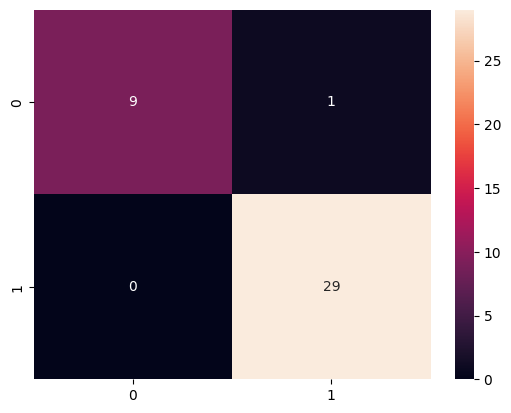

In [187]:
#results for meta classifier with smote and hyperparameter tuning
CM=confusion_matrix(Y_test, Y_pred_meta_classifier)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, Y_pred_meta_classifier)
acc= accuracy_score(Y_test, Y_pred_meta_classifier)
roc=roc_auc_score(Y_test, Y_pred_meta_classifier)
prec = precision_score(Y_test, Y_pred_meta_classifier)
rec = recall_score(Y_test, Y_pred_meta_classifier)
f1 = f1_score(Y_test, Y_pred_meta_classifier)

mathew = matthews_corrcoef(Y_test, Y_pred_meta_classifier)
model_results =pd.DataFrame([['Meta classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew, rec]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef', 'recall'])

model_results

In [188]:
input_data = (197.07600,206.89600,192.05500,0.00001,0.09700,0.00680,0.00802,26.77500,-7.348300,0.177551,0.085569)

# changing input data to a numpy array
#input_data_as_numpy_array = np.asarray(input_data)
input_data_frame = np.array([input_data])
input_data_reshaped = pd.DataFrame(input_data_frame.reshape(1,-1))
input_data_reshaped.columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'HNR', 'spread1', 'spread2', 'PPE']
# reshape the numpy array
print(input_data_frame)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#input_data_reshaped = input_data_frame.values.reshape(1,-1)
print(input_data_reshaped)
# standardize the data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = meta_clf_mutual.predict(std_data)
print(prediction)
#drop these ['name','status','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','Shimmer:APQ3','Shimmer:DDA','NHR','RPDE','DFA','D2']

if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[[ 1.97076e+02  2.06896e+02  1.92055e+02  1.00000e-05  9.70000e-02
   6.80000e-03  8.02000e-03  2.67750e+01 -7.34830e+00  1.77551e-01
   8.55690e-02]]
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  \
0      197.076       206.896       192.055           0.00001   

   MDVP:Shimmer(dB)  Shimmer:APQ5  MDVP:APQ     HNR  spread1   spread2  \
0             0.097        0.0068   0.00802  26.775  -7.3483  0.177551   

        PPE  
0  0.085569  
[[ 1.06591904  0.11702584  1.76366484 -1.06696913 -0.94894581 -0.92050503
  -0.93291542  1.13028583 -1.53082059 -0.61365929 -1.34960241]]
[0]
The Person does not have Parkinsons Disease


In [189]:
acc=pd.DataFrame({'Technique without SMOTE(selected features)':['KNN','Navie Bayes','SVM','XGBoost'],
                 'Accuracy-Testset':[0.87,0.74,0.92,0.95],
                 'F1-Score Testset':[0.91,0.8,0.95,0.97],
                  'Recall-Score Testset':[0.93,0.69,1.0,0.97]})
acc

,Technique without SMOTE(selected features),Accuracy-Testset,F1-Score Testset,Recall-Score Testset
0,KNN,0.87,0.91,0.93
1,Navie Bayes,0.74,0.80,0.69
2,SVM,0.92,0.95,1.00
3,XGBoost,0.95,0.97,0.97


In [190]:
acc2=pd.DataFrame({'Technique with SMOTE(selected features)':['KNN','Navie Bayes','SVM','XGBoost','Meta'],
                 'Accuracy-Testset':[0.95,0.74,0.97,0.95,0.97],
                 'F1-Score Testset':[0.96,0.8,0.98,0.97,0.98],
                  'Recall-Score Testset':[0.93,0.69,0.97,0.97,1.0]})
acc2

,Technique with SMOTE(selected features),Accuracy-Testset,F1-Score Testset,Recall-Score Testset
0,KNN,0.95,0.96,0.93
1,Navie Bayes,0.74,0.80,0.69
2,SVM,0.97,0.98,0.97
3,XGBoost,0.95,0.97,0.97
4,Meta,0.97,0.98,1.00


In [191]:
import pickle

In [192]:
#filename = 'parkinsons_model_mutual1.sav'
#pickle.dump(meta_clf_mutual, open(filename, 'wb'))

In [193]:
# loading the saved model
#loaded_model = pickle.load(open('parkinsons_model_mutual1.sav', 'rb'))

In [194]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(Abs)
MDVP:Shimmer(dB)
Shimmer:APQ5
MDVP:APQ
HNR
spread1
spread2
PPE
